In [3]:
from __future__ import absolute_import, print_function,division, unicode_literals
import os.path
import glob
import shutil

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras

import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [4]:
# import splitfolders
# input_folder = "D:\\DL Project_Rice\\rice_dataset"
# output = "D:\\DL Project_Rice\\Extracted_dataset"

# splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1))

In [5]:
BATCH_SIZE = 8
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [6]:
data_dir ="D:\\DL Project_Rice\\Extracted_dataset-aug"
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['bacterial_leaf_blight','Brown_Spot','Healthy','Hispa','leaf_blast','leaf_scald','narrow_brown_spot','Shath Blight', 'Tungro'])

print('Class Names: ', CLASS_NAMES)

Class Names:  ['bacterial_leaf_blight' 'Brown_Spot' 'Healthy' 'Hispa' 'leaf_blast'
 'leaf_scald' 'narrow_brown_spot' 'Shath Blight' 'Tungro']


In [7]:
train_path = 'D:\\DL Project_Rice\\Extracted_dataset-aug\\train_aug'
test_path = 'D:\\DL Project_Rice\\Extracted_dataset-aug\\test'

In [8]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(test_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 13262 images belonging to 9 classes.
Found 717 images belonging to 9 classes.


In [9]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

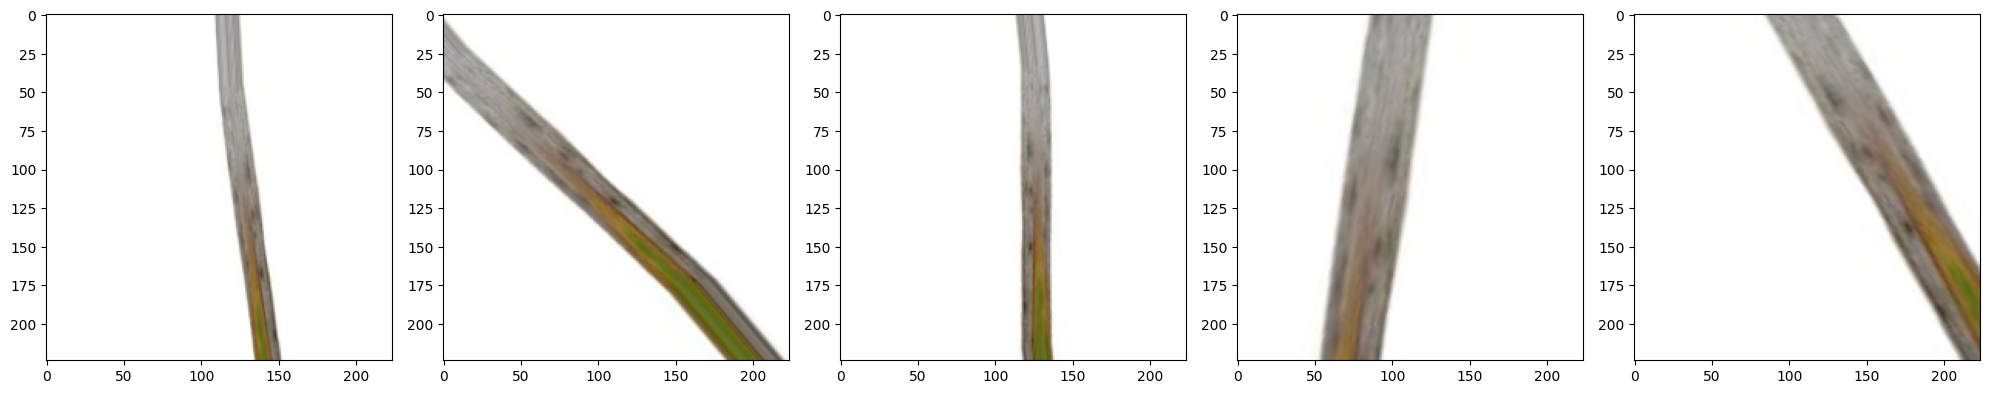

In [10]:
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

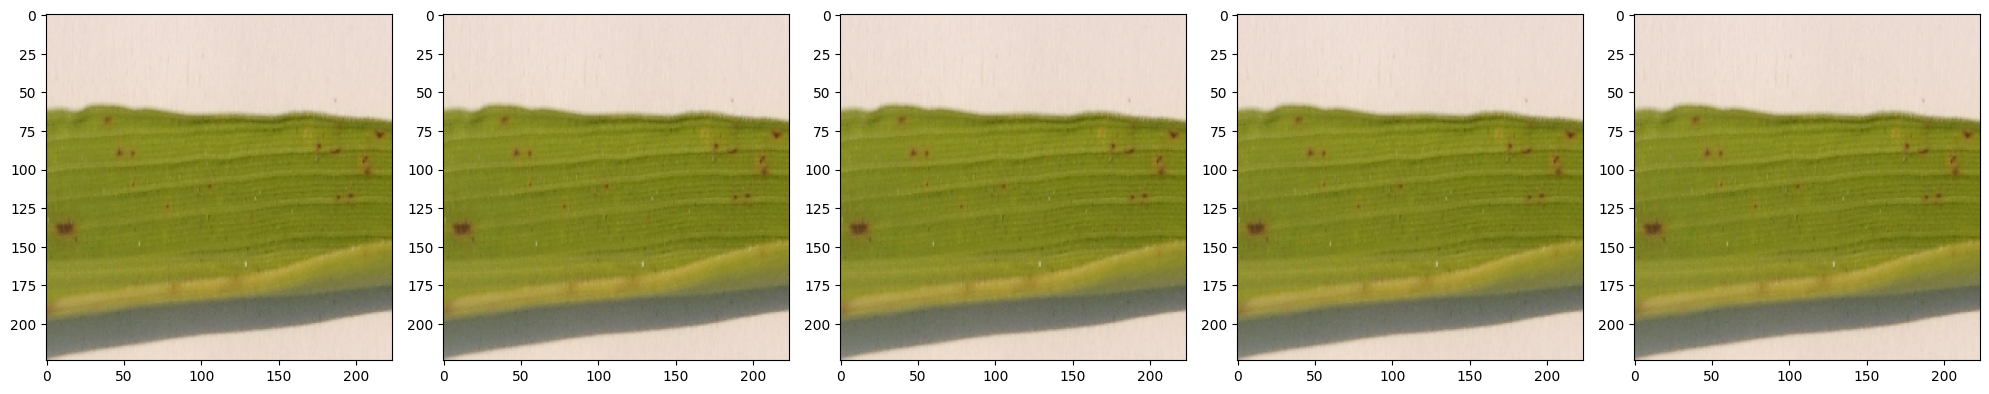

In [11]:
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

In [16]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(9, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 64)      

In [18]:
EPOCHS=80
history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

Epoch 1/80


C:\Users\chakr\AppData\Local\Temp\ipykernel_15972\1948473368.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)


1658/1658 [==============================] - 300s 181ms/step - loss: 1.2179 - accuracy: 0.5479 - val_loss: 0.6419 - val_accuracy: 0.7727
Epoch 2/80
1658/1658 [==============================] - 284s 171ms/step - loss: 0.7615 - accuracy: 0.7166 - val_loss: 0.6495 - val_accuracy: 0.7713
Epoch 3/80
1658/1658 [==============================] - 261s 157ms/step - loss: 0.6310 - accuracy: 0.7592 - val_loss: 0.5753 - val_accuracy: 0.7880
Epoch 4/80
1658/1658 [==============================] - 275s 166ms/step - loss: 0.5335 - accuracy: 0.7914 - val_loss: 0.5336 - val_accuracy: 0.8298
Epoch 5/80
1658/1658 [==============================] - 262s 158ms/step - loss: 0.5053 - accuracy: 0.8012 - val_loss: 0.3742 - val_accuracy: 0.8563
Epoch 6/80
1658/1658 [==============================] - 274s 165ms/step - loss: 0.4698 - accuracy: 0.8150 - val_loss: 0.5038 - val_accuracy: 0.8298
Epoch 7/80
1658/1658 [==============================] - 284s 172ms/step - loss: 0.4325 - accuracy: 0.8317 - val_loss: 0.612

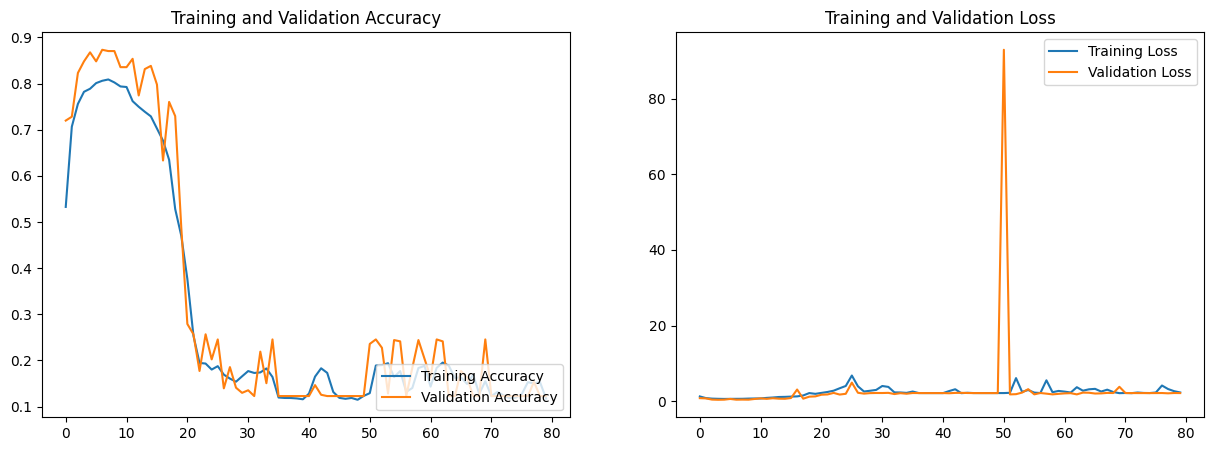

In [ ]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
model.save('RC4.h5')

In [20]:
from keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array

model1 = load_model('D:\\DL Project_Rice\\RC4.h5',compile=False)  

In [21]:
lab = train_data_gen.class_indices
lab={k:v for v,k in lab.items()}

In [22]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    print(answer)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

In [27]:
result = model.evaluate(val_data_gen)
print(result)

90/90 [==============================] - 12s 128ms/step - loss: 0.5536 - accuracy: 0.8577
[0.5535929203033447, 0.857740581035614]


1/1 [==============================] - 0s 43ms/step
[[9.5775104e-01 0.0000000e+00 0.0000000e+00 2.1999151e-20 1.2385642e-26
  2.1281559e-16 3.4700371e-11 9.3379890e-18 4.2248908e-02]]


'Brown_spot_augmented'

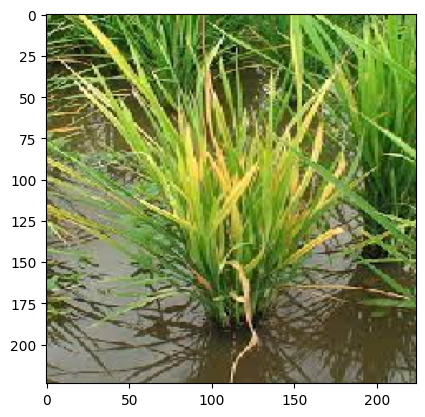

In [26]:
img='D:\\DL Project_Rice\\brown_spot-2.jpg'
pic=load_img('D:\\DL Project_Rice\\tungro-1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

1/1 [==============================] - 0s 19ms/step


'bacterial_leaf_blight_augmented'

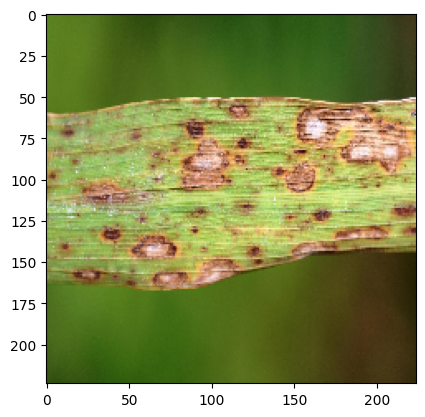

In [ ]:
img='D:\\DL Project_Rice\\leaf_blast-1.jpg'
pic=load_img('D:\\DL Project_Rice\\leaf_blast-1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

1/1 [==============================] - 0s 18ms/step


'bacterial_leaf_blight_augmented'

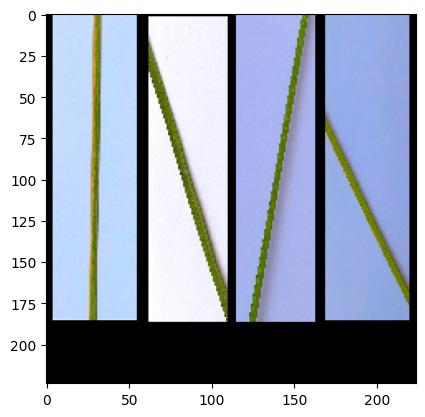

In [ ]:
img='D:\\DL Project_Rice\\Healthy-1.jpg'
pic=load_img('D:\\DL Project_Rice\\Healthy-1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

1/1 [==============================] - 0s 19ms/step


'bacterial_leaf_blight_augmented'

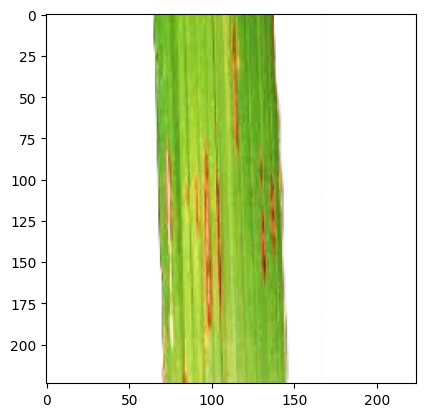

In [ ]:
img='D:\\DL Project_Rice\\Extracted_dataset\\test\\narrow_brown_spot\\narrow_brown (11).jpg'
pic=load_img('D:\\DL Project_Rice\\Extracted_dataset\\test\\narrow_brown_spot\\narrow_brown (11).jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

1/1 [==============================] - 0s 19ms/step


'bacterial_leaf_blight_augmented'

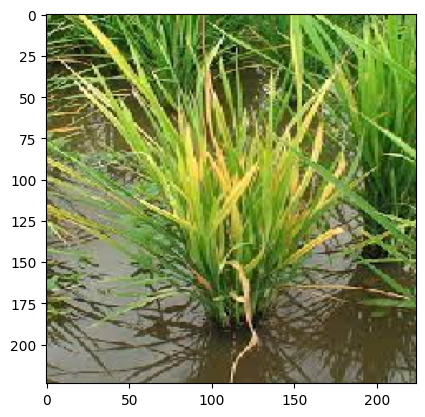

In [ ]:
img='D:\\DL Project_Rice\\tungro-1.jpg'
pic=load_img('D:\\DL Project_Rice\\tungro-1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)